## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

{'Yanyan-Wang': [('Aarebecca', 25.3), ('pomelo-nwu', 25.09), ('yangzy0603', 11.85), ('tyn1998', 9.62), ('yvonneyx', 7.39), ('lidongze0629', 7.25), ('RackweLLizm', 4.5), ('yikenie', 4.25), ('yubo0923', 3.61), ('Maple0817', 3.11), ('wj23027', 2.34), ('frank-zsy', 2.1), ('andyhuang18', 1.14), ('bifenglin', 0.86)], 'Aarebecca': [('Yanyan-Wang', 25.3), ('pomelo-nwu', 24.84), ('yangzy0603', 11.92), ('yvonneyx', 7.73), ('lidongze0629', 6.58), ('tyn1998', 6.4), ('RackweLLizm', 4.84), ('yikenie', 4.55), ('yubo0923', 3.82), ('Maple0817', 3.27), ('frank-zsy', 0.97)], 'pomelo-nwu': [('Yanyan-Wang', 25.09), ('Aarebecca', 24.84), ('yangzy0603', 13.85), ('tyn1998', 12.48), ('lidongze0629', 8.1), ('yvonneyx', 7.63), ('RackweLLizm', 4.97), ('yikenie', 4.66), ('bifenglin', 4.11), ('frank-zsy', 3.96), ('yubo0923', 3.9), ('wj23027', 3.86), ('andyhuang18', 3.56), ('Maple0817', 3.32), ('will-ww', 3.27), ('zhicheng-ning', 2.52), ('PureNatural', 2.36), ('xiaoya-yaya', 2.24), ('xgdyp', 2.1), ('longyanz', 2.1),

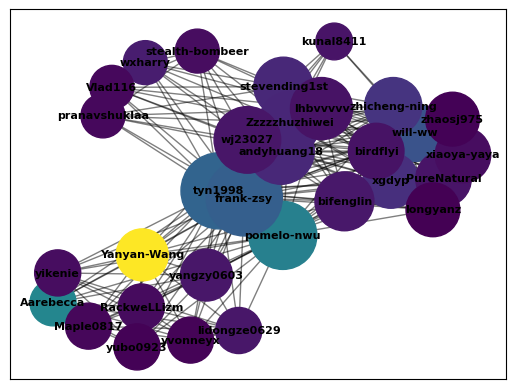

In [94]:
import json
import heapq
import matplotlib.pyplot as plt
import networkx as nx

with open('hw4_data.json','r') as file:
    data=json.load(file)

# 1.社交网络构建与分析
users={user[0]:user[1] for user in data['nodes']}
list1={user:[] for user in users}
for edge in data['edges']:
    user1,user2,w = edge
    list1[user1].append((user2,w))
    list1[user2].append((user1,w))
print(list1) # 邻接表
df={user:[friend for friend,_ in friends] for user, friends in list1.items()}
print(df) #  直接朋友

# 2.统计与度中心性分析
degree={user:len(friends) for user,friends in df.items()}
print(degree) # 每个用户度数
top5_degree=heapq.nlargest(5,degree.items(),key=lambda degree:degree[1])
print(top5_degree) # 度数最高的5个

influence_user=[(user,0.4*users[user]+0.4*degree[user]) for user in users]
top5_inuser=heapq.nlargest(5,influence_user,key=lambda x:x[1])
print(top5_inuser) # 最有影响力的5个

# 3.推荐新朋友
def find_friends(user):
    friens_of=set()
    for friend in df[user]: #先遍历 它的直接伙伴
        for fof in df[friend]: # 再遍历伙伴的直接伙伴
            if fof!=user and fof not in df[user]:
                friens_of.add(fof)
    return list(friens_of)

potiential=find_friends('Yanyan-Wang')
print(potiential) # 朋友的朋友

top5_connection = heapq.nlargest(5,list1['Yanyan-Wang'],key=lambda x:x[1])
print(top5_connection)

# 4.可视化
G=nx.Graph()
for user,influence in users.items():
    G.add_node(user,influence=influence,degree=degree[user]) #建点

for edge in data['edges']: #建边
    user1,user2,w=edge
    G.add_edge(user1,user2,w=w)

plt.Figure(figsize=(12,8))
pos=nx.spring_layout(G) #弹簧嵌入的方法计算节点位置
node_color=[G.nodes[node]['influence'] for node in G.nodes()]  # 颜色根据影响力
node_size=[G.nodes[node]['degree']*100 for node in G.nodes()] # 大小根据入度数

nx.draw_networkx_nodes(G,pos,node_color=node_color,node_size=node_size,cmap=plt.cm.viridis)
nx.draw_networkx_edges(G,pos,alpha=0.5)
nx.draw_networkx_labels(G,pos,font_size=8,font_weight='bold')
plt.show()